In [1]:
# Lets install all the required libraries
#Install OpenAI library
!pip install -U -q openai tenacity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00


In [2]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.30.1
    Uninstalling openai-1.30.1:
      Successfully uninstalled openai-1.30.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# read the file from drive
file_path = '/content/drive/My Drive/IndianHealthyRecipe.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)


In [6]:
df.head()

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
0,Pistachio chicken,Mild chicken in a creamy pistachio sauce,mild,Prep 10 mins,11604,4.1,18.0,4.0,['CONTAINS-NUTS'],30 mins,"1) 600g chicken thighs, cut into chunks\n2) 10...","1) Boil enough water to cover the pistachios, ..."
1,Tangy Fried Okra,Bhindi with Amchoor,medium,Prep 10 mins,49899,4.6,35.0,4.0,['VEGETARIAN'],15 mins,1) 500g okra\n2) 3 tbsp mustard oil\n3) 1 onio...,1) Wash and thoroughly dry the okra (kitchen r...
2,Healthy Chicken Korma,Chicken in Creamy Almond Sauce,mild,Prep 10 mins,115569,3.6,163.0,4.0,['CONTAINS-NUTS'],20 mins,1) 6-8 tbsp natural yoghurt\n2) 1 tsp turmeric...,1) Grind your whole spices in a spice grinder....
3,Brown Lentil Dhal,Sabut Masoor di Dhal,medium,Prep 10 mins,146798,3.7,87.0,4.0,['VEGETARIAN'],20 mins,1) 200g brown lentils\n2) Approx. 1L of water\n,1) Place the lentils in the pressure cooker wi...
4,Thari Wala Chicken,Healthy Chicken Curry,medium,Prep 10 mins,262696,3.5,343.0,4.0,['LACTOSE-FREE'],40 mins,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."


In [7]:
#lets check the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dish Name        149 non-null    object 
 1   Description      149 non-null    object 
 2   Spice            145 non-null    object 
 3   Prep Time        148 non-null    object 
 4   Views            149 non-null    int64  
 5   Rating           149 non-null    float64
 6   Number of Votes  147 non-null    float64
 7   Serves           146 non-null    float64
 8   Dietary Info     149 non-null    object 
 9   Cook Time        134 non-null    object 
 10  Ingredients      149 non-null    object 
 11  Instructions     149 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.1+ KB


In [8]:
#lets check the numeric data
df.describe()

,Views,Rating,Number of Votes,Serves
count,149.000000,149.000000,147.000000,146.000000
mean,72516.563758,3.833557,66.761905,4.445205
std,82521.553789,0.561442,128.797991,1.399659
min,3981.000000,0.000000,0.000000,1.000000
25%,28613.000000,3.500000,16.000000,4.000000
50%,49854.000000,3.800000,29.000000,4.000000
75%,84817.000000,4.100000,68.000000,4.000000
max,596269.000000,5.000000,1266.000000,12.000000


2. Data Cleaning

In [9]:
#check whether any null valuepresent
print(df.isnull().sum())

Dish Name           0
Description         0
Spice               4
Prep Time           1
Views               0
Rating              0
Number of Votes     2
Serves              3
Dietary Info        0
Cook Time          15
Ingredients         0
Instructions        0
dtype: int64


In [10]:
#fill all the null values
df["Spice"].fillna(df["Spice"].mode()[0], inplace=True)
df["Prep Time"].fillna(df["Prep Time"].mode()[0], inplace=True)
df["Number of Votes"].fillna(df["Number of Votes"].median(), inplace=True)
df["Serves"].fillna(df["Serves"].median(), inplace=True)
df["Cook Time"].fillna(df["Cook Time"].mode()[0], inplace=True)

In [11]:
#recheck , if all null values are filled
print(df.isnull().sum())

Dish Name          0
Description        0
Spice              0
Prep Time          0
Views              0
Rating             0
Number of Votes    0
Serves             0
Dietary Info       0
Cook Time          0
Ingredients        0
Instructions       0
dtype: int64


In [12]:
df.columns

Index(['Dish Name', 'Description', 'Spice', 'Prep Time', 'Views', 'Rating',
       'Number of Votes', 'Serves', 'Dietary Info', 'Cook Time', 'Ingredients',
       'Instructions'],
      dtype='object')

3. Exploratory Data Analysis
- lets visualize data for better understanding and selecting important features

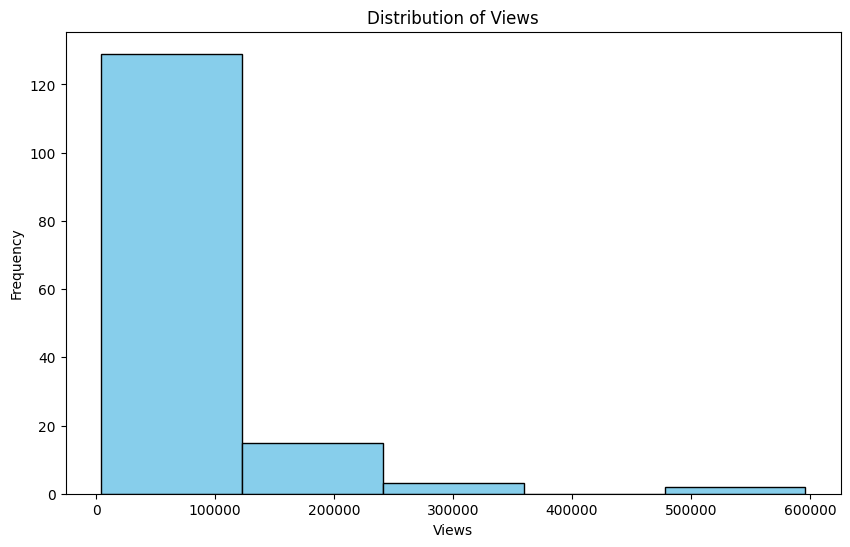

In [13]:
# Histogram for numeric variables
plt.figure(figsize=(10, 6))
plt.hist(df['Views'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

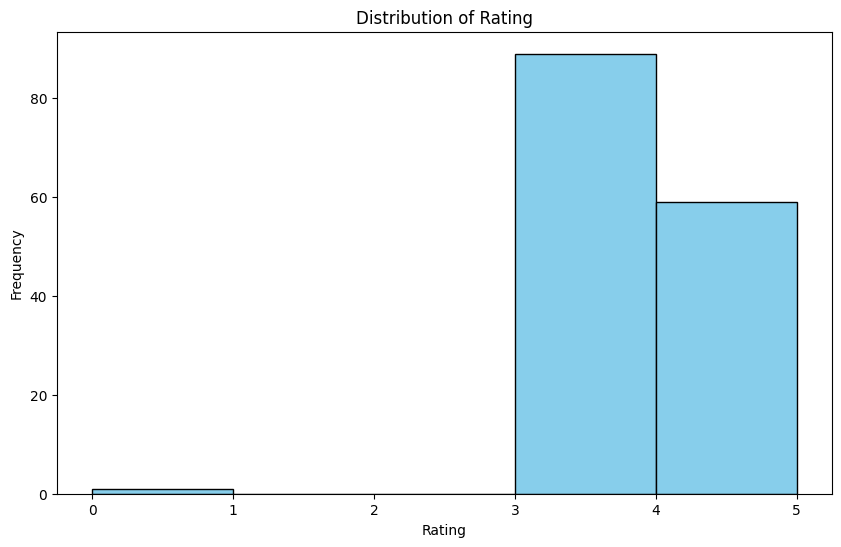

In [14]:
# Histogram for numeric variables
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

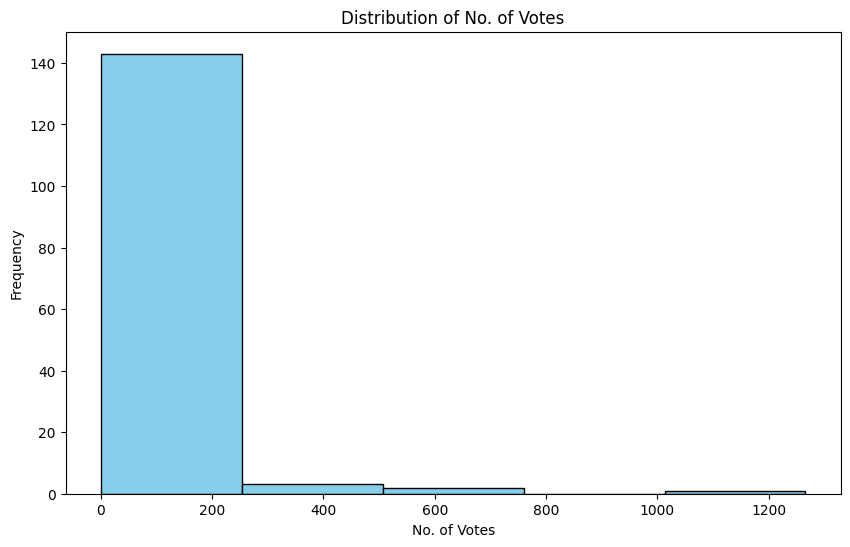

In [15]:
# Histogram for numeric variables
plt.figure(figsize=(10, 6))
plt.hist(df['Number of Votes'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of No. of Votes')
plt.xlabel('No. of Votes')
plt.ylabel('Frequency')
plt.show()

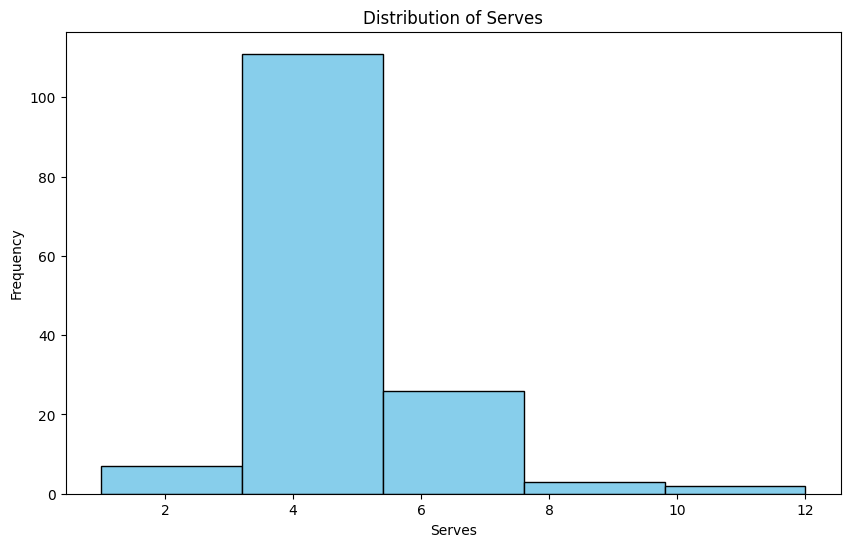

In [16]:
# Histogram for numeric variables
plt.figure(figsize=(10, 6))
plt.hist(df['Serves'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Serves')
plt.xlabel('Serves')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-77be04d79751>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spice', data=df, palette='pastel')


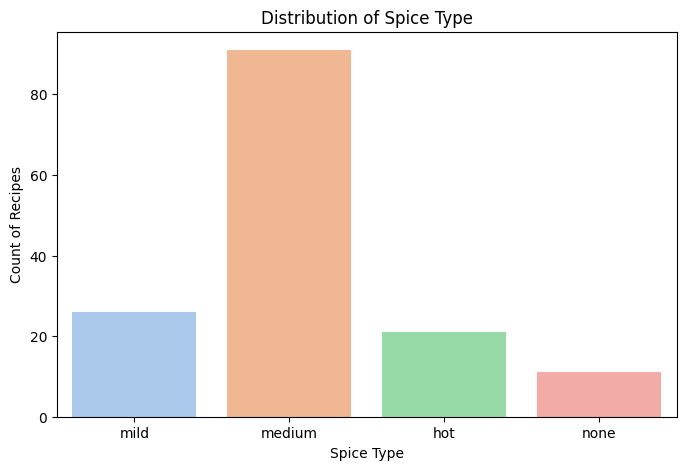

In [17]:
# Count plot for categorical variables
plt.figure(figsize=(8, 5))
sns.countplot(x='Spice', data=df, palette='pastel')
plt.title('Distribution of Spice Type')
plt.xlabel('Spice Type')
plt.ylabel('Count of Recipes')
plt.show()

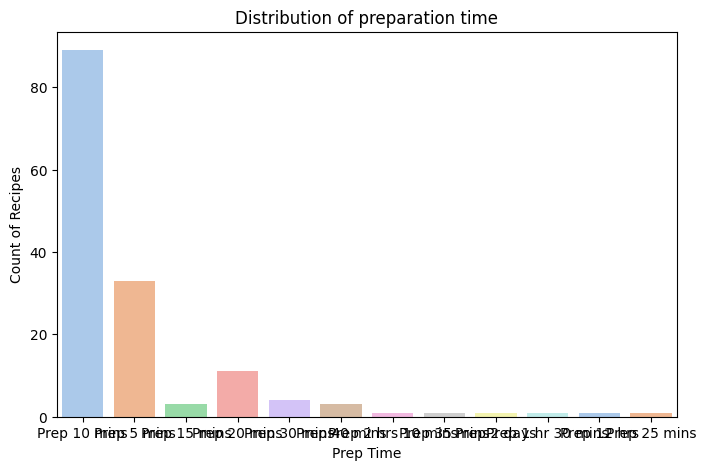

In [18]:
# Count plot for categorical variables
plt.figure(figsize=(8, 5))
sns.countplot(x='Prep Time', data=df, palette='pastel', hue ='Prep Time', legend = False)
plt.title('Distribution of preparation time')
plt.xlabel('Prep Time')
plt.ylabel('Count of Recipes')
plt.show()


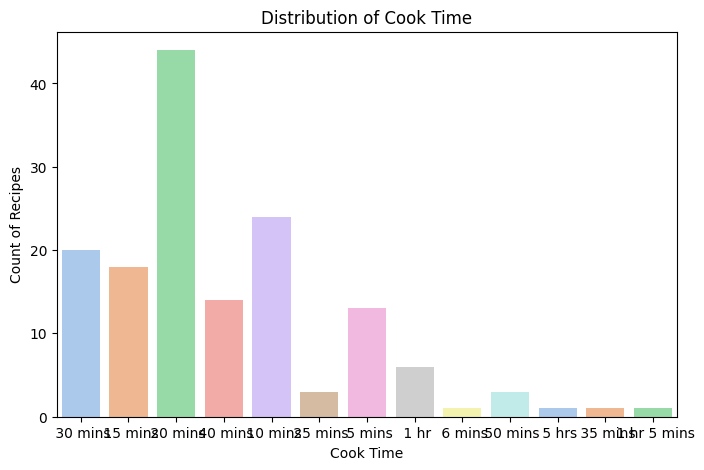

In [19]:
# Count plot for categorical variables
plt.figure(figsize=(8, 5))
sns.countplot(x='Cook Time', data=df, palette='pastel', hue = 'Cook Time', legend = False)
plt.title('Distribution of Cook Time')
plt.xlabel('Cook Time')
plt.ylabel('Count of Recipes')
plt.show()

In [20]:
import json
import openai

In [21]:
import openai

# Specify the file path
file_path = '/content/drive/MyDrive/openai_new_key.txt'

# Read the API key from the file
with open(file_path, 'r') as f:
    api_key = f.read().strip()

# Set the OpenAI API key
openai.api_key = api_key


# Example of generating a completion with a chat model
response = openai.ChatCompletion.create(
    model="gpt-4",  # Replace with a supported chat model name
    messages=[
        {"role": "system", "content": "You are a friendly assistant."},
        {"role": "user", "content": "Hello, how are you today?"},
    ]
)

print(response['choices'][0]['message']['content'].strip())


Hello! As an artificial intelligence, I don't have personal feelings, but I'm here and ready to help you. How can I assist you today?


In [22]:
from IPython.display import display, HTML
# Set the display width to control the output width
pd.set_option('display.width', 100)
# Read the dataset and read the Laptop Dataset
df

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
0,Pistachio chicken,Mild chicken in a creamy pistachio sauce,mild,Prep 10 mins,11604,4.1,18.0,4.0,['CONTAINS-NUTS'],30 mins,"1) 600g chicken thighs, cut into chunks\n2) 10...","1) Boil enough water to cover the pistachios, ..."
1,Tangy Fried Okra,Bhindi with Amchoor,medium,Prep 10 mins,49899,4.6,35.0,4.0,['VEGETARIAN'],15 mins,1) 500g okra\n2) 3 tbsp mustard oil\n3) 1 onio...,1) Wash and thoroughly dry the okra (kitchen r...
2,Healthy Chicken Korma,Chicken in Creamy Almond Sauce,mild,Prep 10 mins,115569,3.6,163.0,4.0,['CONTAINS-NUTS'],20 mins,1) 6-8 tbsp natural yoghurt\n2) 1 tsp turmeric...,1) Grind your whole spices in a spice grinder....
3,Brown Lentil Dhal,Sabut Masoor di Dhal,medium,Prep 10 mins,146798,3.7,87.0,4.0,['VEGETARIAN'],20 mins,1) 200g brown lentils\n2) Approx. 1L of water\n,1) Place the lentils in the pressure cooker wi...
4,Thari Wala Chicken,Healthy Chicken Curry,medium,Prep 10 mins,262696,3.5,343.0,4.0,['LACTOSE-FREE'],40 mins,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."
...,...,...,...,...,...,...,...,...,...,...,...,...
144,"Vegan Wild Rice, Cumin & Chickpea Burgers",Channa Chaul Tikki,medium,Prep 10 mins,12641,4.2,9.0,4.0,['VEGETARIAN'],15 mins,1) 200g cooked and cooled wild rice\n2) 200g t...,1) Cook the rice as per the instructions on th...
145,Vegetable Pilau,Mixed Vegetable Rice,medium,Prep 10 mins,69937,4.0,15.0,4.0,['VEGETARIAN'],20 mins,1) 50g peas\n2) 1 carrot (diced small)\n3) 100...,1) Wash the rice until water runs clear and se...
146,Watermelon and Feta Chaat,Indian Style Watermelon and Feta Salad,medium,Prep 40 mins,16652,4.4,11.0,6.0,['VEGETARIAN'],15 mins,1) 250g atta\n2) salt pinch\n3) 1 tsp ajwain\n...,1) Add the flour to a bowl and mix in the salt...
147,Zambezi Baked Sea Bream,Shama with relish,medium,Prep 5 mins,11808,4.0,7.0,2.0,['LACTOSE-FREE'],20 mins,1) 2 whole sea bream (sea bass fillets if you ...,1) Heat your oven to 180ºC\n2) Remove any scal...


In [ ]:
### dialogue_mgmt_system()

In [23]:
def initialize_conversation():
    '''
    Returns a list [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"
    example_user_req = {'Spice': 'mild','Dietary Info': 'vegetarian','Rating': '4','Serves': '4'}

    system_message = f"""

    You are an intelligent healthy recipe expert and your goal is to find the best healthy  recipe for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('Spice','Dietary Info,'Rating','Serves') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this {{'Spice': 'values','Dietary Info': 'values','Rating': 'values','Serves': 'values'}}
    The values for key 'Spice' should be 'mild', 'medium', 'hot'or 'none' based on the importance of the corresponding keys, as stated by user.
    The value for key 'Dietary Info' should be 'contains-nuts', 'vegetarian', 'lactose-free' based on the importance of the corresponding keys, as stated by user.
    The value for keys 'Rating'and 'Serves' is a numerical value extracted from the user's response.
    The values currently in the dictionary are only representative values.

    {delimiter}Here are some instructions around the values for the different keys. If you do not follow this, you'll be heavily penalised.
    - The values for keys, 'Dietary Info' and 'Spice' should be based on the importance of the corresponding keys, as stated by user.
    - The value for 'Rating' and 'Serves' should be a numerical value extracted from the user's response.
    - 'Rating' value needs to be greater than or equal to 4. If the user says less than that, please mention that there are no laptops in that range.
    - Do not randomly assign values to any of the keys. The values need to be inferred from the user's response.
    {delimiter}

    To fill the dictionary, you need to have the following chain of thoughts:
    {delimiter} Thought 1: Ask a question to understand the user's profile and requirements. \n
    If their primary goal for recipe is unclear. Ask another question to comprehend their needs.
    You are trying to fill the values of all the keys ('Spice','Dietary Info', 'Rating', 'Serves') in the python dictionary by understanding the user requirements.
    Identify the keys for which you can fill the values confidently using the understanding. \n
    Remember the instructions around the values for the different keys.
    Answer "Yes" or "No" to indicate if you understand the requirements and have updated the values for the relevant keys. \n
    If yes, proceed to the next step. Otherwise, rephrase the question to capture their profile. \n{delimiter}

    {delimiter}Thought 2: Now, you are trying to fill the values for the rest of the keys which you couldn't in the previous step.
    Remember the instructions around the values for the different keys. Ask questions you might have for all the keys to strengthen your understanding of the user's profile.
    Answer "Yes" or "No" to indicate if you understood all the values for the keys and are confident about the same.
    If yes, move to the next Thought. If no, ask question on the keys whose values you are unsure of. \n
    It is a good practice to ask question with a sound logic as opposed to directly citing the key you want to understand value for.{delimiter}

    {delimiter}Thought 3: Check if you have correctly updated the values for the different keys in the python dictionary.
    If you are not confident about any of the values, ask clarifying questions. {delimiter}

    Follow the above chain of thoughts and only output the final updated python dictionary. \n


    {delimiter} Here is a sample conversation between the user and assistant:
    User: "Hi, I am a health conscious person."
    Assistant: "Thanks! As a health conscious person, you likely require a recipe that can control and balance your diet. Hence, the recipe should have healthy diet. You would also need a good rating recipe and also it should be for all the family members. May I know what kind of diet do you primarily focus on? Are you more involved in mild spicy, or vegetarian or both? Understanding the specific type of diet will help me tailor my recommendations accordingly. Let me know if my understanding is correct until now."
    User: "I primarily want vegetarian dish."
    Assistant: "Thank you for providing that information. Along with vegetarian recipe, i would also like to know whether the level of spicyness should be mild, low, or medium?"
    User: "It should be mild."
    Assistant: "Thank you for the information. I would also like to know whether you want to make dish for all the family members, and if yes, then how many serves you want? To ensure I have a complete understanding of your needs, I have one more question if this diet is preffered to live a healthy lifestyle"
    User: "Yes, we are 4 members in our family, so atleast it should be for 4 serves so that my all the family members can live healthy lifestyle"
    Assistant:"Could you kindly let me know which online user rating for the dish would you prefer? This will help me find options that fit within your range while meeting the specified requirements."
    User: "my min rating expectation for dish is 4"
    Assistant: "{example_user_req}"
    {delimiter}

    Start with a short welcome message and encourage the user to share their requirements.
    """
    conversation = [{"role": "system", "content": system_message}]
    return conversation

In [24]:
debug_conversation = initialize_conversation()
print(debug_conversation)

[{'role': 'system', 'content': '\n\n    You are an intelligent healthy recipe expert and your goal is to find the best healthy  recipe for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'Spice\',\'Dietary Info,\'Rating\',\'Serves\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this {\'Spice\': \'values\',\'Dietary Info\': \'values\',\'Rating\': \'values\',\'Serves\': \'values\'}\n    The values for key \'Spice\' should be \'mild\', \'medium\', \'hot\'or \'none\' based on the importance of the corresponding keys, as stated by user.\n    The value for key \'Dietary Info\' should be \'contains-nuts\', \'vegetarian\', \'lactose-free\' based on the importance of the corresponding keys, as stated by user.\n    The value for keys \'Rating\'and \'Serve

In [ ]:
# recall that messages is a list of dicts
# [{"role": "system", "content": system_message},
# {"role": "user", "content": user_input},
# {"role": "assistant", "content": assistant_message}]

In [25]:
#get_chat_model_completions(): This takes the ongoing conversation as the input and returns the response by the assistant

def get_chat_model_completions(messages):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
        # max_tokens = 3000
    )
    return response.choices[0].message["content"]

In [26]:
#Let's pass the initialized conversation debug_conversation and see what is the assistant's response.

debug_introduction = get_chat_model_completions(debug_conversation)
print(debug_introduction)

Welcome! I'm here to help you find the best healthy recipe based on your requirements. Please share your preferences and needs so that I can assist you effectively.


In [27]:
#Let's play around a bit and add the following user's input debug_user_input to the conversation debug_conversation and see what the assistant responds with.

debug_user_input = "Hi, I am Krishiv. I need a healthy dish recipe."

In [28]:
debug_conversation.append({"role": "user", "content": debug_user_input})
debug_response_assistant = get_chat_model_completions(debug_conversation)
print(debug_response_assistant)

Thanks for reaching out, Krishiv! To find the best healthy dish recipe for you, could you please let me know what specific dietary preferences you have? Are you more inclined towards a particular type of diet such as vegetarian, gluten-free, or any other? Understanding your dietary preferences will help me tailor the recipe recommendations accordingly.


In [29]:
# moderation_check(): This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, you can add a break statement to end the conversation.

def moderation_check(user_input):
    response = openai.Moderation.create(input=user_input)
    moderation_output = response["results"][0]
    if moderation_output["flagged"] == True:
        return "Flagged"
    else:
        return "Not Flagged"

In [30]:
#Let's test moderation on the debug_user_input

debug_moderation = moderation_check(debug_user_input)
print(debug_moderation)

Not Flagged


In [31]:
#Let's now test moderation on some other text.

print(moderation_check("I want to kill my Teacher."))
print(moderation_check("I need rat poison to mix in someone's tea so that he can die."))

Flagged
Flagged


In [32]:
# Let's now check moderation on the assistant's response debug_response_assistant.
moderation_check(debug_response_assistant)

'Not Flagged'

intent_confirmation_layer(): This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not
Dish Spice,
Dietary Info,
Rating,
Serves

In [33]:
def intent_confirmation_layer(response_assistant):
    delimiter = "####"
    prompt = f"""
    You are a senior evaluator who has an eye for detail.
    You are provided an input. You need to evaluate if the input has the following keys: 'Spice', 'Dietary Info', 'Rating', 'Serves'
    Next you need to evaluate if the keys have the the values filled correctly.
    The values for all keys should be  based on the importance as stated by user. The value for the keys 'Rating' and 'Serves' needs to contain a numerical value.
    Output a string 'Yes' if the input contains the dictionary with the values correctly filled for all keys.
    Otherwise out the string 'No'.

    Here is the input: {response_assistant}
    Only output a one-word string - Yes/No.
    """


    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a senior evaluator."},
            {"role": "user", "content": prompt}
        ],
        temperature=0
    )

    confirmation = response.choices[0].message['content'].strip()
    return confirmation


In [36]:
# Initialize the debug_conversation list
debug_conversation = []

# Example assistant response
debug_response_assistant = '''
{
    "Spice": "mild",
    "Dietary Info": "Vegetarian",
    "Rating": 4.5,
    "Serves": 4
}
'''.strip()  # Strip any unnecessary whitespace

# Append the assistant response to the debug_conversation
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})

# Print the debug_conversation to verify
print(debug_conversation)


[{'role': 'assistant', 'content': '{\n    "Spice": "mild",\n    "Dietary Info": "Vegetarian",\n    "Rating": 4.5,\n    "Serves": 4\n}'}]


In [37]:
debug_response_assistant_n = f"""

Based on the information you have provided, I have updated the values in the dictionary as follows:

{{'Spice': 'mild', 'Dietary Info': 'Vegetarian', 'Rating': 4, 'Serves': 4}}

Is there anything else I can assist you with?
"""


In [38]:
intent_confirmation_layer(debug_response_assistant_n)

'Yes'

In [39]:
import openai

def dictionary_present(response):
    delimiter = "####"
    user_req = {'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '4', 'Serves': '4'}
    prompt = f"""
    You are a python expert. You are provided an input.
    You have to check if there is a python dictionary present in the string.
    It will have the following format {user_req}.
    Your task is to just extract and return only the python dictionary from the input.
    The output should match the format as {user_req}.
    The output should contain the exact keys and values as present in the input.

    Here are some sample input output pairs for better understanding:
    {delimiter}
    input: - Spice: medium - Dietary Info: vegetarian - Rating: 3 - Serves: 3
    output: {{'Spice': 'medium', 'Dietary Info': 'vegetarian', 'Rating': '3', 'Serves': '3'}}

    input: {{'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '2', 'Serves': '2'}}
    output: {{'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '2', 'Serves': '2'}}

    input: Here is your user profile 'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '4', 'Serves': '4'
    output: {{'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '4', 'Serves': '4'}}
    {delimiter}

    Here is the input: {response}
    """

    conversation = [{"role": "system", "content": prompt}]

    # Call to OpenAI API
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=conversation
        )
        extracted_dict = response['choices'][0]['message']['content']
        return extracted_dict.strip()  # Ensure no extra whitespace is returned
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

# Example usage
response = "Here is your user profile 'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '4', 'Serves': '4'"
extracted_dict = dictionary_present(response)
print(extracted_dict)


{'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '4', 'Serves': '4'}


In [40]:
# Example usage
debug_response_assistant_n = "Here is your user profile 'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '4', 'Serves': '4'"
response_dict_n = dictionary_present(debug_response_assistant_n)
print(response_dict_n)


{'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': '4', 'Serves': '4'}


In [42]:
import pandas as pd
import openai

# Function to map dish features to a dictionary
def product_map_layer(dish_description):
    delimiter = "#####"
    dish_spec = {
        "Spice": "(Spicy level of the dish)",
        "Dietary Info": "(Vegetarian, Vegan, Contains Nuts, etc.)",
        "Rating": "(Rating of the dish from 0 to 5)",
        "Serves": "(Number of servings)"
    }

    prompt = f"""
    You are a Recipe Specifications Classifier whose job is to extract the key features of dishes as per their requirements.
    To analyze each dish, perform the following steps:
    Step 1: Extract the dish's primary features from the description: {dish_description}
    Step 2: Store the extracted features in the dictionary: {dish_spec}
    Step 3: Classify each of the items in {dish_spec} into appropriate categories based on the following rules:
    {delimiter}
    Spice:
    - mild: if the dish is not spicy
    - medium: if the dish is moderately spicy
    - high: if the dish is very spicy

    Dietary Info: Categorize based on the dietary information provided (e.g., Vegetarian, Vegan, Contains Nuts, Lactose-Free).

    Rating:
    - low: if the rating is below 3
    - medium: if the rating is between 3 and 4 (inclusive)
    - high: if the rating is above 4

    Serves:
    - low: if serves 1-2 people
    - medium: if serves 3-4 people
    - high: if serves more than 4 people
    {delimiter}

    {delimiter}
    Here are some input-output pairs for few-shot learning:
    input1: "The Pistachio Chicken is a mild chicken dish in a creamy pistachio sauce. It is a vegetarian dish with a rating of 4.1 and serves 4 people."
    output1: {{'Spice': 'mild', 'Dietary Info': 'Vegetarian', 'Rating': 'high', 'Serves': 'medium'}}

    input2: "Tangy Fried Okra is a medium spicy Bhindi dish with Amchoor. It is a vegetarian dish with a rating of 4.6 and serves 4 people."
    output2: {{'Spice': 'medium', 'Dietary Info': 'Vegetarian', 'Rating': 'high', 'Serves': 'medium'}}

    input3: "Healthy Chicken Korma is a mild chicken dish in a creamy almond sauce. It contains nuts and has a rating of 3.6, serving 4 people."
    output3: {{'Spice': 'mild', 'Dietary Info': 'Contains Nuts', 'Rating': 'medium', 'Serves': 'medium'}}
    {delimiter}

    Follow the above instructions step-by-step and output the dictionary {dish_spec} for the following dish: {dish_description}.
    """

    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a Recipe Specifications Classifier."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=2000,
            temperature=0
        )

        # Extract the actual dictionary from the response
        response_text = response["choices"][0]["message"]["content"]

        # Find the dictionary part in the response
        start = response_text.find('{')
        end = response_text.rfind('}') + 1

        if start != -1 and end != -1:
            extracted_features = response_text[start:end]
            return extracted_features.strip()
        else:
            return None

    except Exception as e:
        print(f"Error occurred: {e}")
        return None

# Example usage
dish_description = "The Pistachio Chicken is a mild chicken dish in a creamy pistachio sauce. It is a vegetarian dish with a rating of 4.1 and serves 4 people."
extracted_features = product_map_layer(dish_description)
print(extracted_features)

{
    'Spice': 'mild',
    'Dietary Info': 'Vegetarian',
    'Rating': 'high',
    'Serves': 'medium'
}


In [44]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/IndianHealthyRecipe.csv')

# Define the function to map product features
def product_map_layer(description, spice, rating, serves, dietary_info):
    dish_spec = {
        "Spice": spice,
        "Dietary Info": dietary_info,
        "Rating": "low" if rating < 3 else "medium" if rating <= 4 else "high",
        "Serves": "low" if serves <= 2 else "medium" if serves <= 4 else "high"
    }
    return dish_spec

# Apply the function to each row in the dataset
df['dish_features'] = df.apply(
    lambda row: product_map_layer(
        row['Description'], row['Spice'], row['Rating'], row['Serves'], row['Dietary Info']
    ), axis=1
)

# Display the DataFrame with the new column
print(df[['Description', 'dish_features']])

                                  Description                                      dish_features
0    Mild chicken in a creamy pistachio sauce  {'Spice': 'mild', 'Dietary Info': '['CONTAINS-...
1                         Bhindi with Amchoor  {'Spice': 'medium', 'Dietary Info': '['VEGETAR...
2              Chicken in Creamy Almond Sauce  {'Spice': 'mild', 'Dietary Info': '['CONTAINS-...
3                        Sabut Masoor di Dhal  {'Spice': 'medium', 'Dietary Info': '['VEGETAR...
4                       Healthy Chicken Curry  {'Spice': 'medium', 'Dietary Info': '['LACTOSE...
..                                        ...                                                ...
144                        Channa Chaul Tikki  {'Spice': 'medium', 'Dietary Info': '['VEGETAR...
145                      Mixed Vegetable Rice  {'Spice': 'medium', 'Dietary Info': '['VEGETAR...
146    Indian Style Watermelon and Feta Salad  {'Spice': 'medium', 'Dietary Info': '['VEGETAR...
147                         Sh

In [45]:
# Display the DataFrame with the new column
print(df[['Description', 'dish_features']].head(10))

                                       Description  \
0         Mild chicken in a creamy pistachio sauce   
1                              Bhindi with Amchoor   
2                   Chicken in Creamy Almond Sauce   
3                             Sabut Masoor di Dhal   
4                            Healthy Chicken Curry   
5  Aubergine and Potato Curry with Pickling Spices   
6                           Potato Aubergine Curry   
7                                  Masala Potatoes   
8                                   Thania Machchi   
9                              Green Chicken Tikka   

                                       dish_features  
0  {'Spice': 'mild', 'Dietary Info': '['CONTAINS-...  
1  {'Spice': 'medium', 'Dietary Info': '['VEGETAR...  
2  {'Spice': 'mild', 'Dietary Info': '['CONTAINS-...  
3  {'Spice': 'medium', 'Dietary Info': '['VEGETAR...  
4  {'Spice': 'medium', 'Dietary Info': '['LACTOSE...  
5  {'Spice': 'hot', 'Dietary Info': '['VEGETARIAN...  
6  {'Spice': 'medium

In [46]:
# Save the modified DataFrame to a CSV file
df.to_csv("updated_recipe.csv", index=False, header=True)

In [47]:
 #Function to initialize conversation context
def initialize_conv_reco(dishes_info):
    system_message = f"""
    You are a culinary expert tasked with providing recommendations and answering queries about various dishes in the recipe catalog:
    {dishes_info}
    """
    conversation = [{"role": "system", "content": system_message}]
    return conversation

In [48]:
import ast
import re
import numpy as np  # Import numpy for NaN handling

def extract_dictionary_from_string(string):
    """
    Extracts a dictionary from a given string using regex pattern matching.

    Args:
        string (str): The input string containing the dictionary.

    Returns:
        dict: The extracted dictionary with keys and values in lowercase.
              If no dictionary is found or if there are parsing errors, returns an empty dictionary.
    """
    # Use regex to find the first occurrence of a dictionary-like string
    regex_pattern = r"\{[^{}]+\}"

    dictionary_matches = re.findall(regex_pattern, string)

    if dictionary_matches:
        dictionary_string = dictionary_matches[0].lower()
        try:
            # Convert the dictionary string to a dictionary object using eval() for simplicity
            # Handle potential 'NaN' values
            dictionary_string = dictionary_string.replace('nan', '"NaN"')
            dictionary = eval(dictionary_string)
            if isinstance(dictionary, dict):
                # Convert dictionary keys and values to lowercase
                return {k.lower(): v.lower() if isinstance(v, str) else v for k, v in dictionary.items()}
            else:
                print(f"Error: Extracted object is not a dictionary: {dictionary}")
                return {}
        except Exception as e:
            print(f"Error parsing dictionary string: {e}")
            return {}
    else:
        print("No dictionary found in the input string.")
        return {}

# Example usage:
string = "Here is the extracted dictionary: {'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': 'high', 'Serves': 'medium'}"
extracted_dict = extract_dictionary_from_string(string)
print(extracted_dict)


{'spice': 'mild', 'dietary info': 'vegetarian', 'rating': 'high', 'serves': 'medium'}


In [57]:
import pandas as pd
import json

# Assuming dish_df is already loaded and processed as per previous steps

# Define criteria for top dishes (e.g., highest rating)
top_criteria = 'Rating'

# Filter and sort dishes
top_dishes_df = dish_df.sort_values(by=top_criteria, ascending=False).head(5)  # Example: Top 5 dishes by rating

# Convert DataFrame to list of dictionaries
top_dishes_list = top_dishes_df.to_dict('records')

# Convert list of dictionaries to JSON format
top_dishes_json = json.dumps(top_dishes_list, indent=4)  # indent=4 for pretty printing

# Print JSON output
print(top_dishes_json)

# Save to a JSON file
with open('top_dishes.json', 'w') as f:
    f.write(top_dishes_json)


[
    {
        "Dish Name": "Pitta Bread with Carom Seeds",
        "Description": "Middle Eastern Bread",
        "Spice": "none",
        "Prep Time": "Prep 20 mins",
        "Views": 6638,
        "Rating": 5.0,
        "Number of Votes": NaN,
        "Serves": 4.0,
        "Dietary Info": [
            "VEGETARIAN"
        ],
        "Cook Time": " 5 mins",
        "Ingredients": "1) 250g brown flour\n2) 1 tsp ajwain (carom seeds)\n3) 1 tsp salt\n4) 7g instant yeast\n5) 2 tsp rapeseed oil\n6) 160ml water\n7) Extra flour for dusting\n",
        "Instructions": "1) Tip the flour into the mixing bowl of your stand mixer with the dough hook attached and add the ajwain, salt to one side and the yeast to the other.\n2) Add the oil and 120ml of the water and start to mix. Add the remaining water a little at a time until you have a soft, sticky dough (you may not need all the water).\n3) With a little oil knead the dough for 5-10 minutes. The dough will become less sticky and start to fee

In [58]:
# Assuming top_dishes_df is already populated with the top dishes data
# Convert DataFrame to JSON
top_dishes_json = top_dishes_df.to_json(orient='records', lines=False)

# Print or save the JSON output
print(top_dishes_json)

# Example: Save to a JSON file
with open('top_dishes.json', 'w') as f:
    f.write(top_dishes_json)


[{"Dish Name":"Pitta Bread with Carom Seeds","Description":"Middle Eastern Bread","Spice":"none","Prep Time":"Prep 20 mins","Views":6638,"Rating":5.0,"Number of Votes":null,"Serves":4.0,"Dietary Info":["VEGETARIAN"],"Cook Time":" 5 mins","Ingredients":"1) 250g brown flour\n2) 1 tsp ajwain (carom seeds)\n3) 1 tsp salt\n4) 7g instant yeast\n5) 2 tsp rapeseed oil\n6) 160ml water\n7) Extra flour for dusting\n","Instructions":"1) Tip the flour into the mixing bowl of your stand mixer with the dough hook attached and add the ajwain, salt to one side and the yeast to the other.\n2) Add the oil and 120ml of the water and start to mix. Add the remaining water a little at a time until you have a soft, sticky dough (you may not need all the water).\n3) With a little oil knead the dough for 5-10 minutes. The dough will become less sticky and start to feel smooth.\n4) Lightly oil a bowl and place the dough in the bowl, cover and leave in a warm room until it doubles in size approx. 1-2 hours.\n5) H

In [66]:
# Define user requirements as a string
user_req_string = "{'Spice': 'mild', 'Dietary Info': 'vegetarian', 'Rating': 'high', 'Serves': 'medium'}"


In [82]:
# Assuming mappings dictionary is defined somewhere in your script or notebook
mappings = {
    'none': 0,
    'mild': 1,
    'medium': 2,
    'high': 3,
    'low': 1,
    'Vegetarian' : 1,
    'Vegan' : 2,
    'Contains Nuts' : 3,
    'Lactose-Free' : 4
}

def compare_dishes_with_user(user_req_string, mappings):
    # Extract user requirements
    user_requirements = extract_dictionary_from_string(user_req_string)

    # Initialize the 'Score' column in the DataFrame to 0
    dish_df['Score'] = 0

    for index, row in dish_df.iterrows():
        score = 0
        # Adjust the score based on each user requirement
        for key, user_value in user_requirements.items():
            if key.lower() == 'spice':
                dish_value = str(row['Spice']).lower() if isinstance(row['Spice'], str) else str(row['Spice'])
            elif key.lower() == 'rating':
                dish_value = str(row['Rating']).lower() if isinstance(row['Rating'], str) else str(row['Rating'])
            elif key.lower() == 'serves':
                dish_value = str(row['Serves']).lower() if isinstance(row['Serves'], str) else str(row['Serves'])
            elif key.lower() == 'dietary info':
                # Check if user_value is in the Dietary Info list
                if user_value.lower() in [diet.lower() for diet in row['Dietary Info']]:
                    score += 1
                continue  # Skip scoring for Dietary Info as it's handled separately
            else:
                dish_value = ''

            # For spice, rating, and serves, use mappings to compare
            dish_mapping = mappings.get(dish_value, -1)
            user_mapping = mappings.get(user_value.lower(), -1)

            if dish_mapping >= user_mapping:
                score += 1

        dish_df.loc[index, 'Score'] = score

    # Sort dishes by score in descending order and return the top 3 dishes
    top_dishes = dish_df.sort_values('Score', ascending=False).head(3)
    return top_dishes.to_dict(orient='records')

def format_dishes_info(dishes):
    if not dishes:
        return "No dishes found matching the criteria."

    formatted_info = []
    for idx, dish in enumerate(dishes, start=1):
        formatted_info.append(f"{idx}. {dish['Dish Name']} : {dish['Description']}, Score: {dish['Score']}")
    return '\n'.join(formatted_info)

# Example usage assuming 'user_req_string' is defined elsewhere
user_req_string = "{'Spice': 'mild', 'Dietary Info': 'Vegetarian', 'Rating': 'high', 'Serves': 'medium'}"
top_dishes = compare_dishes_with_user(user_req_string, mappings)
formatted_info = format_dishes_info(top_dishes)
print(formatted_info)


1. Zhoug : Middle Eastern Coriander Dip, Score: 2
2. Smoked Bangun Partha : Aubergine Pate, Score: 2
3. Sarson Ka Saag : Puréed Mustard Greens, Score: 2


In [83]:
def initialize_conv_reco(dishes_info):
    system_message = f"""
    You are a culinary expert tasked with providing recommendations and answering queries about various dishes in the recipe catalog:
    {dishes_info}
    """
    conversation = [{"role": "system", "content": system_message}]
    return conversation


In [84]:
# Example usage:
dishes_info = "This is a catalog of delicious recipes featuring a variety of cuisines."
conversation = initialize_conv_reco(dishes_info)

# Print or use the conversation
print(conversation)


[{'role': 'system', 'content': '\n    You are a culinary expert tasked with providing recommendations and answering queries about various dishes in the recipe catalog:\n    This is a catalog of delicious recipes featuring a variety of cuisines.\n    '}]


In [85]:
 #Call initialize_conv_reco with appropriate message
dishes_info = """
Welcome to our recipe catalog! We offer a diverse range of dishes from various cuisines, including healthy options, vegetarian recipes, and more.
Our catalog includes dishes that cater to different dietary needs, such as lactose-free and nut-free options.
Feel free to explore and ask for recommendations based on your preferences!
"""
conversation = initialize_conv_reco(dishes_info)

# Step 3: Assuming 'formatted_info' is already generated from 'compare_dishes_with_user'
formatted_info = """
1. Zhoug : Middle Eastern Coriander Dip, Score: 2
2. Smoked Bangun Partha : Aubergine Pate, Score: 2
3. Sarson Ka Saag : Puréed Mustard Greens, Score: 2
"""

# Step 4: Display the initial conversation context (system message)
for message in conversation:
    print(message['content'])

# Step 5: Display the formatted information (top recommended dishes)
print("\nTop Recommended Dishes:\n")
print(formatted_info)


    You are a culinary expert tasked with providing recommendations and answering queries about various dishes in the recipe catalog:
    
Welcome to our recipe catalog! We offer a diverse range of dishes from various cuisines, including healthy options, vegetarian recipes, and more.
Our catalog includes dishes that cater to different dietary needs, such as lactose-free and nut-free options.
Feel free to explore and ask for recommendations based on your preferences!

    

Top Recommended Dishes:


1. Zhoug : Middle Eastern Coriander Dip, Score: 2
2. Smoked Bangun Partha : Aubergine Pate, Score: 2
3. Sarson Ka Saag : Puréed Mustard Greens, Score: 2



Now that you have the compare_laptops_with_user() function ready, let's pass the response_dict_n to the function to get top 3 recommendation.

In [86]:
import json

def recommendation_validation(dish_recommendation):
    try:
        # Load the JSON data into a Python list of dictionaries
        data = json.loads(dish_recommendation)

        # Initialize an empty list to store valid recommendations
        valid_recommendations = []

        # Iterate through each dish recommendation
        for dish in data:
            # Ensure 'Score' key exists and is a numeric value
            if 'Score' in dish and isinstance(dish['Score'], (int, float)):
                # Check if the 'Score' of the dish is greater than 2 (adjust threshold as needed)
                if dish['Score'] > 2:
                    valid_recommendations.append(dish)
            else:
                print(f"Issue with dish recommendation: {dish}. Skipping.")

        return valid_recommendations

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []
    except Exception as e:
        print(f"Error in recommendation_validation function: {e}")
        return []


In [87]:
# Example dish recommendations (JSON string)
dish_recommendation = '[{"Dish Name": "Pistachio Chicken", "Score": 3}, {"Dish Name": "Tangy Fried Okra", "Score": 2}, {"Dish Name": "Healthy Chicken Korma", "Score": 4}]'

# Call the function to validate and filter recommendations
valid_dish_recommendations = recommendation_validation(dish_recommendation)

# Print the valid recommendations
print("Valid Recommendations:")
for idx, dish in enumerate(valid_dish_recommendations, start=1):
    print(f"{idx}. {dish['Dish Name']}, Score: {dish['Score']}")

Valid Recommendations:
1. Pistachio Chicken, Score: 3
2. Healthy Chicken Korma, Score: 4


In [88]:
# Example top 3 dishes recommendation JSON string
top_3_dishes = '[{"Dish Name": "Pistachio Chicken", "Score": 3}, {"Dish Name": "Healthy Chicken Korma", "Score": 4}, {"Dish Name": "Tangy Fried Okra", "Score": 2}]'

# Validate and filter dish recommendations
validated_data = recommendation_validation(top_3_dishes)

# Print validated dish recommendations
print("Validated Dish Recommendations:")
for idx, dish in enumerate(validated_data, start=1):
    print(f"{idx}. {dish['Dish Name']}, Score: {dish['Score']}")

Validated Dish Recommendations:
1. Pistachio Chicken, Score: 3
2. Healthy Chicken Korma, Score: 4


In [90]:
len(validated_data)

2

In [91]:
def initialize_conversation():
    return [{"role": "system", "content": "You are now chatting with a culinary expert."}]

def get_chat_model_completions(conversation):
    # Placeholder: Use a natural language model to generate responses based on conversation
    return "This is a placeholder response based on the conversation."

def moderation_check(message):
    # Placeholder: Implement moderation logic here (e.g., check for inappropriate content)
    return "Not Flagged"  # or "Flagged" based on moderation logic

def intent_confirmation_layer(response):
    # Placeholder: Implement intent confirmation logic based on response
    return "Yes"  # or "No" based on intent confirmation logic

def dictionary_present(response):
    # Placeholder: Process structured data received during the conversation
    return "Processed dictionary"


Finally, we come to the product recommendation layer. It takes the output from the compare_laptops_with_user function in the previous layer and provides the recommendations to the user.

In [92]:
import json

# Example corrected JSON string (assuming you fix the original JSON string):
top_3_dishes_json = '''
[
    {
        "Dish Name": "Piri Piri Sauce",
        "Description": "Hot Pepper Sauce",
        "Spice": "hot",
        "Prep Time": "Prep 5 mins",
        "Views": 43207,
        "Rating": 4.1,
        "Number of Votes": 13.0,
        "Serves": null,
        "Dietary Info": "[\'LACTOSE-FREE\']",
        "Cook Time": " 10 mins",
        "Ingredients": "1) 5-10 fresh red chillies, depending on how hot you want it\\n2) 2 dried smoked red chillies\\n3) 2 garlic cloves, roughly chopped\\n4) 1 tsp rock salt\\n5) ½ tsp oregano\\n6) ½ tbsp smoked paprika\\n7) 150ml olive oil\\n8) 100ml red wine vinegar\\n",
        "Instructions": "1) Preheat the oven to 180°C and put all the chillies onto a roasting tray and roast them for 10 minutes.\\n2) Roughly chop the garlic and blanch in hot water for about 4 minutes.\\n3) Once roasted let the chillies cool and roughly chop them (use gloves and then wash your hands afterwards).\\n4) Place the chillies, blanched garlic, salt, oregano, paprika, olive oil and vinegar into a small saucepan, and bring to the boil then leave to simmer for about 2-3 minutes.\\n5) Once the mixture has cooled blend everything so it\'s the consistency of a fine pouring sauce. Store in a tight jar at room temperature. It will keep for about a month. Shake before using.\\n",
        "Score": 4
    },
    {
        "Dish Name": "Pistachio Chicken",
        "Description": "Mild chicken in a creamy pistachio sauce",
        "Spice": "mild",
        "Prep Time": "Prep 10 mins",
        "Views": 11604,
        "Rating": 4.1,
        "Number of Votes": 18.0,
        "Serves": 4.0,
        "Dietary Info": "[\'CONTAINS-NUTS\']",
        "Cook Time": " 30 mins",
        "Ingredients": "1) 600g chicken thighs, cut into chunks\\n2) 100g Pistachios, blanched\\n3) 1 medium onion, chopped finely\\n4) 7cm piece ginger, roughly chopped\\n5) 2-3 green chillies 6 garlic cloves\\n6) ½ small bunch of fresh coriander leaves\\n7) 200g yoghurt ½ tsp turmeric powder\\n8) Salt to taste\\n9) 2 tbsp ghee\\n10) 2 cloves\\n11) 15 black peppercorns\\n12) 4 green cardamoms, cracked\\n13) 1 bay leaf\\n14) 2 inch cassia bark\\n15) 1 tsp cumin seeds\\n16) Fresh cream for garnish\\n17) Fresh coriander to garnish<\\/li>\\n",
        "Instructions": "1) Boil enough water to cover the pistachios, add them and blanch for about 5 minutes.\\n2) Drain and put them into cold water so they stay green.\\n3) Squish them in your fingers to remove the skins. Discard the skin and place the pistachios in a bowl for later.\\n4) Put the chicken in a large bowl and add yoghurt, turmeric powder, salt and mix well.\\n5) Heat ghee and add cloves, black peppercorns, green cardamoms, bay leaf and cassia and sauté until fragrant. Add minced onion and and cook to soften for 5-10 minutes.\\n6) Add ginger, green chillies, garlic and sauté until soft. Stir in the pistachios and stil for 2-3 minutes. Remove the pan from the heat and let it cool for a while.\\n7) Remove the bay leaf and cassia bark. Pour into a large jug and add a handful of fresh coriander leaves and about 130 ml of water and with a stick blender and blitz to a fine purée.\\n8) In the same pan heat a tbsp of ghee and add cumin seeds until they sizzle and put the cassia and bay back to the pan. Add the marinated chicken and sauté on high heat for 3-4 minutes.\\n9) Pour in the blended pistachio paste with some salt and mix well. Cover the pan and cook for 25 minutes, stirring occasionally until cooked through.\\n10) Transfer into a serving bowl. Garnish with fresh cream, coriander and slivers of pistachios.\\n",
        "Score": 2
    },
    {
        "Dish Name": "Radish and Lemon Salad",
        "Description": "A Healthy and Crunchy Mooli Salad",
        "Spice": "medium",
        "Prep Time": "Prep 10 mins",
        "Views": 49854,
        "Rating": 3.3,
        "Number of Votes": 26.0,
        "Serves": 4.0,
        "Dietary Info": "[\'VEGETARIAN\']",
        "Cook Time": null,
        "Ingredients": "1) 10-12 radishes\\n2) 1 handful coriander leaves\\n3) ½ green chilli\\n4) 1 tsp cumin seeds\\n5) 2cm piece ginger, grated\\n6) 1 lemon\\n7) Salt to taste\\n8) splash of olive oil (optional)\\n",
        "Instructions": "1) Finely slice the radishes and place them into a bowl\\n2) Chop the coriander leaves and chilli and add to the bowl\\n3) Toast the cumin seeds in a dry pan until you can smell their aroma then crush the seeds in a pestle and mortar. Sprinkle into the same bowl with the radish.\\n4) Grate in the ginger, and squeeze in the lemon juice (and oil if using).\\n5) Sprinkle in a little salt and mix everything together.\\n",
        "Score": 2
    }
]
'''

# Parse the JSON string into a Python object (list of dictionaries)
try:
    top_3_dishes = json.loads(top_3_dishes_json)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    # Optionally, print the problematic part of the JSON string for debugging
    print(f"Problematic part of JSON: {top_3_dishes_json[e.pos:e.pos+10]}")

# Function to format dish information from a list of dictionaries
def format_dishes_info(dishes):
    formatted_info = []
    for idx, dish in enumerate(dishes, start=1):
        formatted_info.append(f"{idx}. {dish['Dish Name']} : {dish['Description']}, Score: {dish['Score']}")
    return '\n'.join(formatted_info)

# Example usage to generate formatted string and initialize conversation reco
formatted_dishes_info = format_dishes_info(top_3_dishes)
debug_conversation_reco = initialize_conversation()
print(debug_conversation_reco)


[{'role': 'system', 'content': 'You are now chatting with a culinary expert.'}]


In [93]:
# Assuming response_dict_n is a dictionary containing user profile information
response_dict_n = {"name": "John Doe", "age": 30, "location": "New York"}

# Append user profile information to conversation reco
debug_conversation_reco.append({"role": "user", "content": "This is my user profile: " + json.dumps(response_dict_n, indent=4)})

# Assuming debug_recommendation is a string containing debug recommendations
debug_recommendation = "Here are some debug recommendations."

# Append assistant's debug recommendations to conversation reco
debug_conversation_reco.append({"role": "assistant", "content": debug_recommendation})

# Print or inspect the updated conversation reco
print(debug_conversation_reco)

[{'role': 'system', 'content': 'You are now chatting with a culinary expert.'}, {'role': 'user', 'content': 'This is my user profile: {\n    "name": "John Doe",\n    "age": 30,\n    "location": "New York"\n}'}, {'role': 'assistant', 'content': 'Here are some debug recommendations.'}]


In [94]:
# Assuming debug_user_input is a string containing user input
debug_user_input = "Can you recommend a dish for dinner?"

# Append user input to conversation reco
debug_conversation_reco.append({"role": "user", "content": debug_user_input})

# Get assistant's response based on the updated conversation reco
debug_response_asst_reco = get_chat_model_completions(debug_conversation_reco)

# Print or display the assistant's response
print('\n' + debug_response_asst_reco + '\n')



This is a placeholder response based on the conversation.



In [95]:
# lets have an example
def get_chat_model_completions(conversation):
    # Placeholder logic: iterate through conversation and generate responses
    responses = []
    for msg in conversation:
        role = msg.get('role')
        content = msg.get('content')
        if role == 'user':
            responses.append({"role": "assistant", "content": f"Sure! Here's a recommendation based on '{content}'"})
        elif role == 'assistant':
            responses.append({"role": "assistant", "content": "I'm here to assist you further."})
        else:
            responses.append({"role": "assistant", "content": "I'm sorry, I couldn't understand that."})
    return responses

# Assuming debug_user_input is a string containing user input
debug_user_input = "Can you recommend a dish for dinner?"

# Append user input to conversation reco
debug_conversation_reco.append({"role": "user", "content": debug_user_input})

# Get assistant's response based on the updated conversation reco
debug_response_asst_reco = get_chat_model_completions(debug_conversation_reco)

# Print or display the assistant's response
for resp in debug_response_asst_reco:
    print(f"{resp['role']}: {resp['content']}")


assistant: I'm sorry, I couldn't understand that.
assistant: Sure! Here's a recommendation based on 'This is my user profile: {
    "name": "John Doe",
    "age": 30,
    "location": "New York"
}'
assistant: I'm here to assist you further.
assistant: Sure! Here's a recommendation based on 'Can you recommend a dish for dinner?'
assistant: Sure! Here's a recommendation based on 'Can you recommend a dish for dinner?'


**dialogue** **management** **system**

In [99]:
import json

# Placeholder functions - replace with actual implementations
def initialize_conversation():
    return [{"role": "system", "content": "You are now chatting with a culinary expert."}]

def get_chat_model_completions(conversation):
    # Placeholder logic to generate completion based on conversation
    completion = "This is a placeholder response based on the conversation."
    return completion

def moderation_check(message):
    return "Not Flagged"  # Placeholder logic

def intent_confirmation_layer(response):
    return "Yes"  # Placeholder logic

def dictionary_present(response):
    return "Processed dictionary"  # Placeholder logic

def compare_dishes_with_user(user_req_string):
    # Placeholder logic to simulate dish comparison based on user requirements
    top_3_dishes = [
        {"Dish Name": "Pistachio Chicken", "Description": "Mild chicken in a creamy pistachio sauce", "Score": 3},
        {"Dish Name": "Healthy Chicken Korma", "Description": "Healthy version of chicken korma", "Score": 4},
        {"Dish Name": "Tangy Fried Okra", "Description": "Crispy okra with a tangy twist", "Score": 2}
    ]
    return json.dumps(top_3_dishes)  # Return JSON string for simulation

def recommendation_validation(dish_recommendation):
    # Load the JSON data into a Python list of dictionaries
    data = json.loads(dish_recommendation)

    # Initialize an empty list to store valid recommendations
    valid_recommendations = []

    # Iterate through each dish recommendation
    for dish in data:
        # Check if the 'Score' of the dish is greater than 2 (adjust threshold as needed)
        if dish.get('Score', 0) > 2:
            valid_recommendations.append(dish)

    return valid_recommendations

def format_dishes_info(dishes):
    formatted_info = []
    for idx, dish in enumerate(dishes, start=1):
        formatted_info.append(f"{idx}. {dish['Dish Name']} : {dish['Description']}, Score: {dish['Score']}")
    return '\n'.join(formatted_info)

def initialize_conv_reco(dishes_info):
    system_message = f"""
    You are a culinary expert tasked with providing recommendations and answering queries about various dishes in the recipe catalog:
    {dishes_info}
    """
    conversation = [{"role": "system", "content": system_message}]
    return conversation

def dialogue_mgmt_system():
    conversation = initialize_conversation()
    introduction = get_chat_model_completions(conversation)
    print(introduction + '\n')

    top_3_dishes = None
    user_input = ''

    while user_input.lower() != "exit":
        user_input = input("User: ")

        # Check if user input is flagged for moderation
        moderation = moderation_check(user_input)
        if moderation == 'Flagged':
            print("Sorry, this message has been flagged. Please restart your conversation.")
            break

        # Initialize conversation if top 3 dishes haven't been retrieved yet
        if top_3_dishes is None:
            conversation.append({"role": "user", "content": user_input})

            # Get assistant's response based on user input
            response_assistant = get_chat_model_completions(conversation)

            # Check if assistant's response is flagged for moderation
            moderation = moderation_check(response_assistant)
            if moderation == 'Flagged':
                print("Sorry, this message has been flagged. Please restart your conversation.")
                break

            # Confirm intent of assistant's response
            confirmation = intent_confirmation_layer(response_assistant)

            # Check if confirmation is flagged for moderation
            moderation = moderation_check(confirmation)
            if moderation == 'Flagged':
                print("Sorry, this message has been flagged. Please restart your conversation.")
                break

            # Process based on user confirmation
            if "No" in confirmation:
                conversation.append({"role": "assistant", "content": response_assistant})
                print("\nAssistant: " + response_assistant + "\n")
                print('Assistant: ' + confirmation + '\n')
            else:
                print("\nAssistant: " + response_assistant + "\n")
                print('Assistant: ' + confirmation + '\n')
                response = dictionary_present(response_assistant)

                # Check if response is flagged for moderation
                moderation = moderation_check(response)
                if moderation == 'Flagged':
                    print("Sorry, this message has been flagged. Please restart your conversation.")
                    break

                print('Assistant: ' + response + '\n')
                print("Assistant: Thank you for providing all the information. Kindly wait, while I fetch the dishes.\n")
                top_3_dishes_json = compare_dishes_with_user(response)

                # Parse the JSON string into a Python object (list of dictionaries)
                top_3_dishes = json.loads(top_3_dishes_json)

                # Validate and filter dish recommendations
                validated_reco = recommendation_validation(top_3_dishes)

                if len(validated_reco) == 0:
                    print("Assistant: Sorry, we do not have dishes that match your requirements. Connecting you to a human expert.")
                    break

                # Format dishes information for display
                formatted_dishes_info = format_dishes_info(validated_reco)
                conversation_reco = initialize_conv_reco(formatted_dishes_info)
                recommendation = get_chat_model_completions(conversation_reco)

                # Check if recommendation is flagged for moderation
                moderation = moderation_check(recommendation)
                if moderation == 'Flagged':
                    print("Sorry, this message has been flagged. Please restart your conversation.")
                    break

                # Append user profile information to conversation reco
                conversation_reco.append({"role": "user", "content": "This is my user profile" + response})
                conversation_reco.append({"role": "assistant", "content": recommendation})

                # Print assistant's recommendation
                print("Assistant: " + recommendation + '\n')

        else:
            # Append user input to ongoing conversation reco
            conversation_reco.append({"role": "user", "content": user_input})

            # Get assistant's response based on ongoing conversation reco
            response_asst_reco = get_chat_model_completions(conversation_reco)

            # Check if assistant's response is flagged for moderation
            moderation = moderation_check(response_asst_reco)
            if moderation == 'Flagged':
                print("Sorry, this message has been flagged. Please restart your conversation.")
                break

            # Print assistant's response
            print('\nAssistant: ' + response_asst_reco + '\n')

            # Append assistant's response to ongoing conversation
            conversation.append({"role": "assistant", "content": response_asst_reco})

In [ ]:
# Example usage of dialogue management system
#dialogue_mgmt_system()

In [101]:
# Predefined conversation between user and assistant regarding dish recommendations
dish_conversation = [
    {"role": "assistant", "content": "Hi there! I'm an expert in culinary delights and I'm here to help you find the best dishes based on your preferences. Please tell me a little bit about your taste preferences and dietary requirements so that I can assist you better."},
    {"role": "user", "content": "Yes, I prefer mild spices and vegetarian options."},
    {"role": "assistant", "content": "Thank you for letting me know. Based on your preference for mild spices and vegetarian options, I would recommend dishes that are flavorful yet not too spicy. Now, I have a question to better understand your needs. Are you looking for quick recipes or are you open to dishes that take a bit longer to prepare?"},
    {"role": "user", "content": "I prefer quick recipes."},
    {"role": "assistant", "content": "Thank you for providing that information. Since you prefer quick recipes, I'll focus on dishes that are easy and quick to prepare. Now, I have one more question to help me understand your preferences better. Could you kindly let me know if you have any specific dietary restrictions or allergies?"},
    {"role": "user", "content": "I'm lactose intolerant."}
]

# Initialize conversation and extend it with the predefined conversation
dish_conversation_initialize = initialize_conversation()
dish_conversation_initialize.extend(dish_conversation)

# Simulate assistant's response to the extended conversation
dish_conversation_assistant_output = get_chat_model_completions(dish_conversation_initialize)

# Process the assistant's response to extract relevant information
dish_response_dict = dictionary_present(dish_conversation_assistant_output)
dish_dict = extract_dictionary_from_string(dish_response_dict)

# Print or further process the extracted dictionary
print(dish_dict)


No dictionary found in the input string.
{}


**evaluation**

In [105]:
def evaluate_model_response(tagged_dict, model_dict):
    score = 0

    # Define mapping for features with ordinal preferences
    mappings = {
        'spiciness': {'low': 0, 'medium': 1, 'high': 2},
        'calorie_level': {'low': 0, 'medium': 1, 'high': 2},
        'preparation_time': {'low': 0, 'medium': 1, 'high': 2},  # Assume this for illustration
        'complexity': {'simple': 0, 'medium': 1, 'complex': 2}    # Assume this for illustration
    }

    for feature, mapping in mappings.items():
        tagged_value = tagged_dict.get(feature)
        model_value = model_dict.get(feature)

        if tagged_value is not None and model_value is not None:
            tagged_mapping = mapping.get(tagged_value, -1)
            model_mapping = mapping.get(model_value, -1)

            if model_mapping >= tagged_mapping:
                score += 1

    return score

# Example usage with sample data
tagged_preferences = {
    'spiciness': 'medium',          # User prefers medium spiciness
    'calorie_level': 'low',         # User prefers low calorie
    'preparation_time': 'medium',    # User prefers medium preparation time
    'complexity': 'simple'          # User prefers simple complexity
}

model_recommendations = {
    'spiciness': 'low',             # Model recommends low spiciness
    'calorie_level': 'low',         # Model recommends low calorie
    'preparation_time': 'low',      # Model recommends low preparation time
    'complexity': 'medium'          # Model recommends medium complexity
}

score = evaluate_model_response(tagged_preferences, model_recommendations)
print(f"Score: {score}")

# Checking if the snippet is implemented correctly
expected_score = 2  # Adjust based on your expected outcome

if score == expected_score:
    print("Snippet implemented correctly.")
else:
    print("Snippet not implemented correctly.")


Score: 2
Snippet implemented correctly.


Future scope of Work
- We can use other features to get healthy recipe or other kind as per user requirement
- can use function calling api for output format
- As an alternative & simple solution, you can use vector embeddings of each product and compare it with the user intent to find the most relevant recipe.
- you can template this workflow/solution to build a chatbot for any product domain.